In [1]:
import matplotlib.pyplot as plt

import numpy as np
import torch
from interpretability.comparison.fixedpoints import find_fixed_points
import os
from interpretability.comparison.analysis.tt.tt import Analysis_TT
# Import pca
from sklearn.decomposition import PCA
import glob
import cv2
import shutil
import imageio
import matplotlib.colors as mcolors

/home/csverst/miniconda3/envs/build5/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
suffix = "NBFF_GRU"
filepath1 = (
"/home/csverst/Github/InterpretabilityBenchmark/"
"trained_models/task-trained/20240129_NBFF_GRU/"
)
plot_path = (
    "/home/csverst/Github/InterpretabilityBenchmark/"
    f"interpretability/comparison/plots/{suffix}/"
)
os.makedirs(plot_path, exist_ok=True)

comp = Analysis_TT(run_name=suffix, filepath=filepath1)


2024-01-29 12:01:48,528	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-29 12:01:49,411	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [4]:
fps = comp.compute_FPs(learning_rate=1e-2,
                       max_iters =  20000)


Iteration 500/10000
q = 2.73E-02 +/- 1.19E-01
dq = 1.04E-04 +/- 4.43E-04

Iteration 1000/10000
q = 4.71E-03 +/- 2.11E-02
dq = 1.48E-05 +/- 6.78E-05

Iteration 1500/10000
q = 1.33E-03 +/- 6.04E-03
dq = 2.51E-06 +/- 1.17E-05

Iteration 2000/10000
q = 6.64E-04 +/- 3.11E-03
dq = 6.69E-07 +/- 3.33E-06

Iteration 2500/10000
q = 4.33E-04 +/- 2.03E-03
dq = 3.28E-07 +/- 1.74E-06

Iteration 3000/10000
q = 3.14E-04 +/- 1.49E-03
dq = 1.75E-07 +/- 9.18E-07

Iteration 3500/10000
q = 2.41E-04 +/- 1.16E-03
dq = 1.35E-07 +/- 8.01E-07

Iteration 4000/10000
q = 1.84E-04 +/- 8.89E-04
dq = 8.96E-08 +/- 5.16E-07

Iteration 4500/10000
q = 1.45E-04 +/- 6.71E-04
dq = 6.64E-08 +/- 4.27E-07

Iteration 5000/10000
q = 1.17E-04 +/- 5.16E-04
dq = 4.82E-08 +/- 3.03E-07

Iteration 5500/10000
q = 9.67E-05 +/- 4.20E-04
dq = 3.57E-08 +/- 2.08E-07

Iteration 6000/10000
q = 8.18E-05 +/- 3.64E-04
dq = 2.63E-08 +/- 1.44E-07

Iteration 6500/10000
q = 7.08E-05 +/- 3.32E-04
dq = 1.98E-08 +/- 1.01E-07

Iteration 7000/10000
q = 

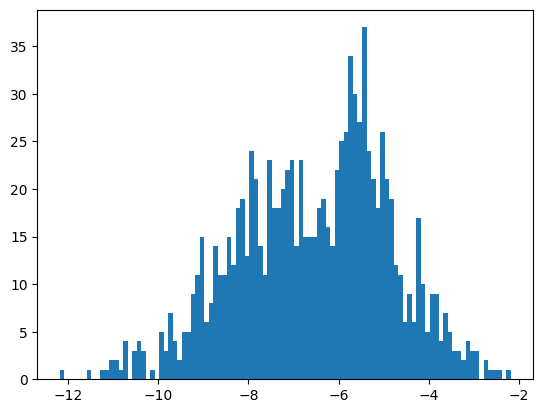

In [8]:
q_vals = fps.qstar
fig1= plt.hist(np.log10(q_vals), bins=100)


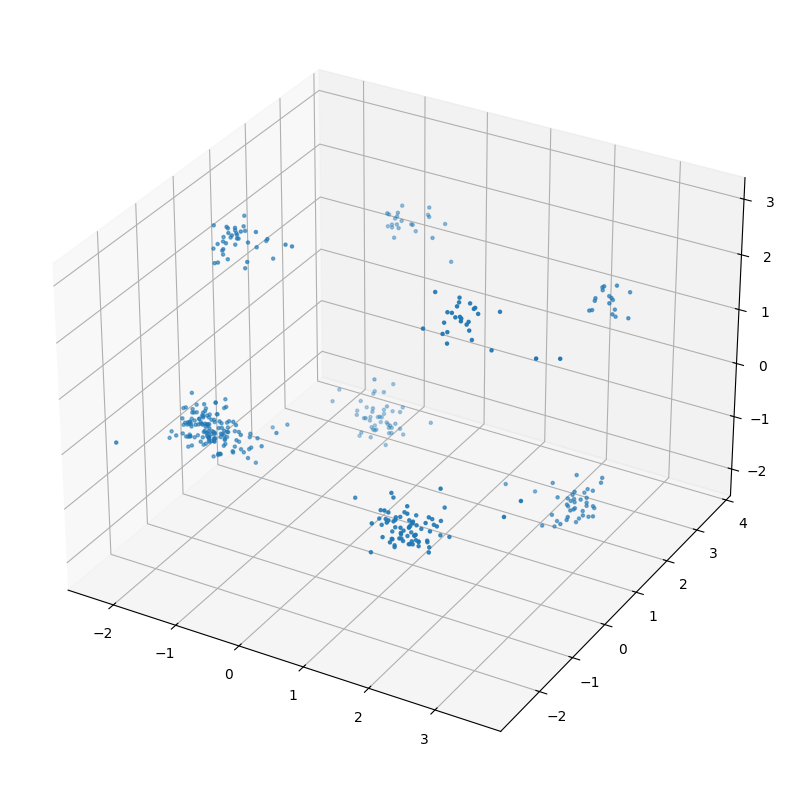

In [12]:
q_thresh = 1e-7
qFlag = q_vals < q_thresh
x_FP = fps.xstar[qFlag]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
pca = PCA(n_components=3)
pca.fit(x_FP)
x_pca = pca.transform(x_FP)
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], s=5)